In [438]:
import warnings
warnings.filterwarnings("ignore")

In [439]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [440]:
train = pd.read_csv('C:/Users/manis/OneDrive/Desktop/trains.csv')
store = pd.read_csv('C:/Users/manis/OneDrive/Desktop/store.csv')
feature = pd.read_csv('C:/Users/manis/OneDrive/Desktop/features.csv')


In [441]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [442]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [443]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-06,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-07,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-08,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-02-09,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [444]:
merge_df=pd.merge(train,feature, on=['Store','Date'], how='inner')
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [445]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,9784.0,3.239984,1.615704,1.000000,2.000000,3.000000,5.000000,6.000000
Dept,9784.0,43.244072,29.618079,1.000000,19.000000,36.000000,71.000000,99.000000
Weekly_Sales,9784.0,19109.830002,28837.411704,-1098.000000,2525.580000,7891.360000,22237.805000,385051.040000
Temperature,9784.0,64.856373,15.642344,31.600000,52.340000,66.150000,79.292500,90.220000
Fuel_Price,9784.0,3.231516,0.402165,2.572000,2.752000,3.288000,3.620000,3.845000
MarkDown1,4072.0,5906.544263,5312.892572,89.980000,2460.030000,3772.690000,9262.120000,24134.430000
MarkDown2,2715.0,1100.225827,1967.454458,0.150000,34.880000,164.770000,779.600000,7208.510000
MarkDown3,4011.0,495.056477,1134.850359,0.300000,6.620000,65.340000,199.380000,5146.880000
MarkDown4,3948.0,2464.028972,3591.157725,8.820000,200.480000,606.150000,3463.030000,14114.900000
MarkDown5,4072.0,4027.805796,2791.858686,328.160000,1962.170000,3234.790000,5926.450000,10618.930000


In [446]:
from datetime import datetime as dt

In [447]:
merge_df['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()


0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: DateTimeObj, dtype: datetime64[ns]

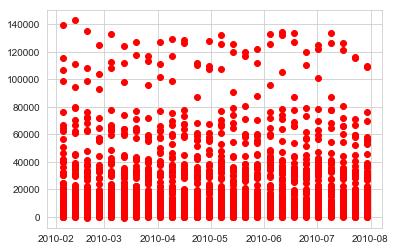

In [448]:
plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [449]:
weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [450]:
weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Store  Dept
1      1        589066.84
       2       1189438.46
       3        269447.51
       4        938760.46
       5        567948.82
Name: Weekly_Sales, dtype: float64

In [451]:
weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [452]:
walmartstore=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
walmartstore.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
2,1,2010-02-19,1611968.17,74.78,2.854,NaN,NaN,NaN,NaN,NaN,210.337426,7.808,False
3,1,2010-02-26,1409727.59,80.91,2.669,NaN,NaN,NaN,NaN,NaN,211.223533,7.787,False
4,1,2010-03-05,1554806.68,86.65,2.664,NaN,NaN,NaN,NaN,NaN,211.603363,7.787,False


In [453]:
walmartstoredf = walmartstore.iloc[:, list(range(5)) + list(range(10,13))]
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,51.45,2.732,211.018042,8.106,False
2,1,2010-02-19,1611968.17,74.78,2.854,210.337426,7.808,False
3,1,2010-02-26,1409727.59,80.91,2.669,211.223533,7.787,False
4,1,2010-03-05,1554806.68,86.65,2.664,211.603363,7.787,False


In [454]:
walmartstoredf['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmartstoredf['Date'])]
weekNo=walmartstoredf.reset_index()
weekNo = [(x - walmartstoredf['DateTimeObj'][0]) for x in list(walmartstoredf['DateTimeObj'])]
walmartstoredf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0
1,1,2010-02-12,1641957.44,51.45,2.732,211.018042,8.106,False,2010-02-12,1.0
2,1,2010-02-19,1611968.17,74.78,2.854,210.337426,7.808,False,2010-02-19,2.0
3,1,2010-02-26,1409727.59,80.91,2.669,211.223533,7.787,False,2010-02-26,3.0
4,1,2010-03-05,1554806.68,86.65,2.664,211.603363,7.787,False,2010-03-05,4.0


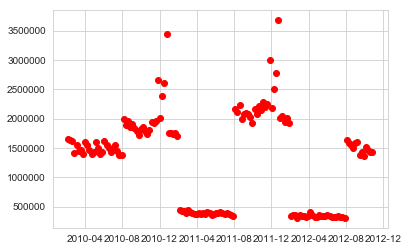

In [455]:
plt.plot(walmartstoredf.DateTimeObj, walmartstoredf.Weekly_Sales, 'ro')
plt.show()


In [456]:
walmartstoredf['IsHolidayInt'] = [int(x) for x in list(walmartstoredf.IsHoliday)]
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0
1,1,2010-02-12,1641957.44,51.45,2.732,211.018042,8.106,False,2010-02-12,1.0,0
2,1,2010-02-19,1611968.17,74.78,2.854,210.337426,7.808,False,2010-02-19,2.0,0
3,1,2010-02-26,1409727.59,80.91,2.669,211.223533,7.787,False,2010-02-26,3.0,0
4,1,2010-03-05,1554806.68,86.65,2.664,211.603363,7.787,False,2010-03-05,4.0,0


In [457]:
walmartstoredf.Store.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

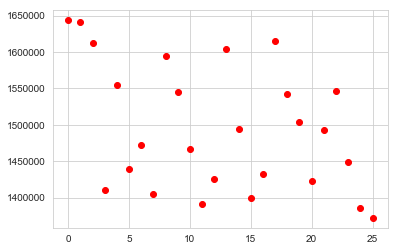

In [458]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
plt.plot(walmartstoredf[(walmartstoredf.Store==1)].Week, walmartstoredf[(walmartstoredf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [459]:
XTrain = train_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']

In [460]:
XTrain.describe()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt
count,100.000000,100.000000,96.000000,96.000000,100.000000,100.00000
mean,64.707500,3.222540,202.033484,6.777219,72.230000,0.08000
std,15.661649,0.395487,34.458545,0.975546,41.394104,0.27266
min,31.600000,2.572000,126.139200,3.879000,1.000000,0.00000
25%,51.600000,2.821750,211.250627,6.237000,37.750000,0.00000
50%,65.220000,3.288000,215.061130,6.855000,73.000000,0.00000
75%,79.292500,3.605750,221.794016,7.564000,106.250000,0.00000
max,90.220000,3.845000,228.729864,8.623000,142.000000,1.00000


In [461]:
XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt
84,48.08,2.752,126.669267,7.127,84.0,1
28,73.31,2.854,209.998458,8.200,28.0,0
40,46.66,3.112,218.999550,7.441,40.0,0
86,46.56,3.305,128.264750,6.510,86.0,0
24,59.23,3.417,225.170160,6.314,24.0,0


In [462]:
XTrain = XTrain.interpolate()

In [463]:
XTest = test_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']

In [464]:
XTest = XTest.interpolate()

In [465]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [466]:
wmLinear.coef_

array([ -3423.01492911, 209105.37177766, -13229.90651357,  70006.35956655,
        -6043.70162767, -23831.82384568])

In [467]:
YHatTest = wmLinear.predict(XTest)

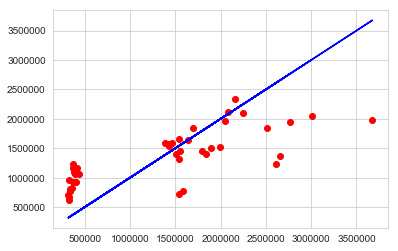

In [468]:
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [469]:
walmartstoredf['Store'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [470]:
Store_Dummies = pd.get_dummies(walmartstoredf.Store, prefix='Store').iloc[:,1:]
walmartstoredf = pd.concat([walmartstoredf, Store_Dummies], axis=1)

In [471]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,Store_6
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0,0,0,0,0,0
1,1,2010-02-12,1641957.44,51.45,2.732,211.018042,8.106,False,2010-02-12,1.0,0,0,0,0,0,0
2,1,2010-02-19,1611968.17,74.78,2.854,210.337426,7.808,False,2010-02-19,2.0,0,0,0,0,0,0
3,1,2010-02-26,1409727.59,80.91,2.669,211.223533,7.787,False,2010-02-26,3.0,0,0,0,0,0,0
4,1,2010-03-05,1554806.68,86.65,2.664,211.603363,7.787,False,2010-03-05,4.0,0,0,0,0,0,0


In [472]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTrain = train_WM.Weekly_Sales
                                                    
XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTest=test_WM.Weekly_Sales

In [473]:
XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,Store_6
84,48.08,2.752,126.669267,7.127,84.0,1,0,0,1,0,0
28,73.31,2.854,209.998458,8.200,28.0,0,1,0,0,0,0
40,46.66,3.112,218.999550,7.441,40.0,0,1,0,0,0,0
86,46.56,3.305,128.264750,6.510,86.0,0,0,0,1,0,0
24,59.23,3.417,225.170160,6.314,24.0,0,0,0,0,0,0


In [474]:
XTrain = XTrain.interpolate()

In [475]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [476]:
YTest = YTest.interpolate()
XTest = XTest.interpolate()

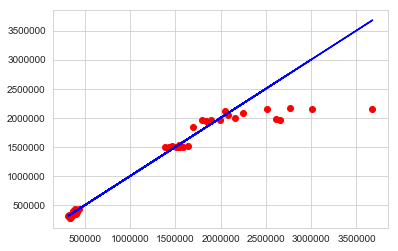

In [477]:
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [478]:
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print(MAPE, MSSE)

0.08372198868902848 106639715892.91458


In [479]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
alphas = np.linspace(10, 20, 10)

In [480]:
testError = np.empty(10)

for i, alpha in enumerate(alphas) :
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(XTrain, YTrain)
    testError[i] = mean_squared_error(YTest, lasso.predict(XTest))

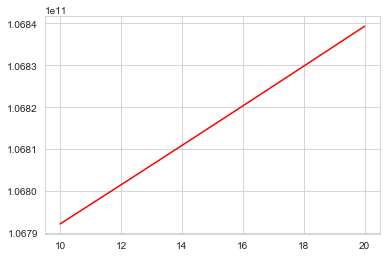

In [481]:
plt.plot(alphas, testError, 'r-')
plt.show()

In [482]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [483]:
lasso = Lasso(alpha=17)
lasso.fit(XTrain, YTrain)

Lasso(alpha=17, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)